In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Orders.xlsx",sheet_name="Orders")

In [3]:
df.tail()

,Order ID,Order Date,customer_id,CustomerName,State,City,order_total,Product cost,Category,Profit
495,496,2018-08-03,97,Aarushi,Nagaland,Kohima,1749,572,Phones,1177
496,497,2018-03-26,99,Vaibhav,Maharashtra,Pune,1749,572,Shoes,1177
497,498,2018-07-01,101,Savi,Maharashtra,Mumbai,1749,564,Phones,1185
498,499,2018-08-22,103,Jahan,Madhya Pradesh,Indore,1749,572,Earphones,1177
499,500,2018-03-28,105,Parishi,Madhya Pradesh,Indore,1749,564,Earphones,1185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    int64         
 1   Order Date    500 non-null    datetime64[ns]
 2   customer_id   500 non-null    int64         
 3   CustomerName  500 non-null    object        
 4   State         500 non-null    object        
 5   City          500 non-null    object        
 6   order_total   500 non-null    int64         
 7   Product cost  500 non-null    int64         
 8   Category      500 non-null    object        
 9   Profit        500 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 39.2+ KB


In [5]:
df.describe()

,Order ID,customer_id,order_total,Product cost,Profit
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,138.824000,2261.484000,954.840000,1306.644000
std,144.481833,87.197292,228.831557,426.104086,421.256681
min,1.000000,1.000000,1749.000000,339.000000,-3004.000000
25%,125.750000,63.000000,2049.000000,774.000000,1185.000000
50%,250.500000,131.000000,2399.000000,900.000000,1499.000000
75%,375.250000,215.000000,2399.000000,953.000000,1543.000000
max,500.000000,297.000000,2599.000000,5403.000000,2161.000000


In [6]:
df.groupby(["State","City"])["Profit"].agg(["sum","max","min"]).sort_values(by="sum", ascending=False)

,,sum,max,min
State,City,,,
Nagaland,Kohima,165607,2000,-3004
Maharashtra,Mumbai,111347,2161,-615
Madhya Pradesh,Indore,100432,1657,598
Maharashtra,Pune,57106,2000,333
West Bengal,Kolkata,55770,2000,-135
Kerala,Thiruvananthapuram,38097,1657,717
Karnataka,Bangalore,36175,1657,-2103
Madhya Pradesh,Bhopal,32624,1657,483
Jammu and Kashmir,Kashmir,29216,1657,-944


In [7]:
df["Month"] = df["Order Date"].dt.strftime("%B")

In [8]:
df["Month"]

0         March
1      February
2       January
3      December
4        August
         ...   
495      August
496       March
497        July
498      August
499       March
Name: Month, Length: 500, dtype: object

In [9]:
df

,Order ID,Order Date,customer_id,CustomerName,State,City,order_total,Product cost,Category,Profit,Month
0,1,2018-03-10,1,Harivansh,Uttar Pradesh,Mathura,2599,1145,Phones,1454,March
1,2,2018-02-03,3,Madhav,Madhya Pradesh,Indore,2599,1145,Phones,1454,February
2,3,2018-01-24,5,Madan Mohan,Himachal Pradesh,Simla,2599,1145,Tables,1454,January
3,4,2018-12-27,7,Gopal,Himachal Pradesh,Simla,2599,1145,Phones,1454,December
4,5,2018-08-21,9,Vishakha,Nagaland,Kohima,2599,2291,Phones,308,August
...,...,...,...,...,...,...,...,...,...,...,...
495,496,2018-08-03,97,Aarushi,Nagaland,Kohima,1749,572,Phones,1177,August
496,497,2018-03-26,99,Vaibhav,Maharashtra,Pune,1749,572,Shoes,1177,March
497,498,2018-07-01,101,Savi,Maharashtra,Mumbai,1749,564,Phones,1185,July
498,499,2018-08-22,103,Jahan,Madhya Pradesh,Indore,1749,572,Earphones,1177,August


In [10]:
df.groupby(["Month"])["order_total"].agg(["sum"]).sort_values(by="sum",ascending=False)

,sum
Month,
January,140756
March,129140
February,122353
November,104572
April,99689
October,98009
December,93510
August,71103
May,69601


### Maximum Sales is held in first 3 months of year

[]

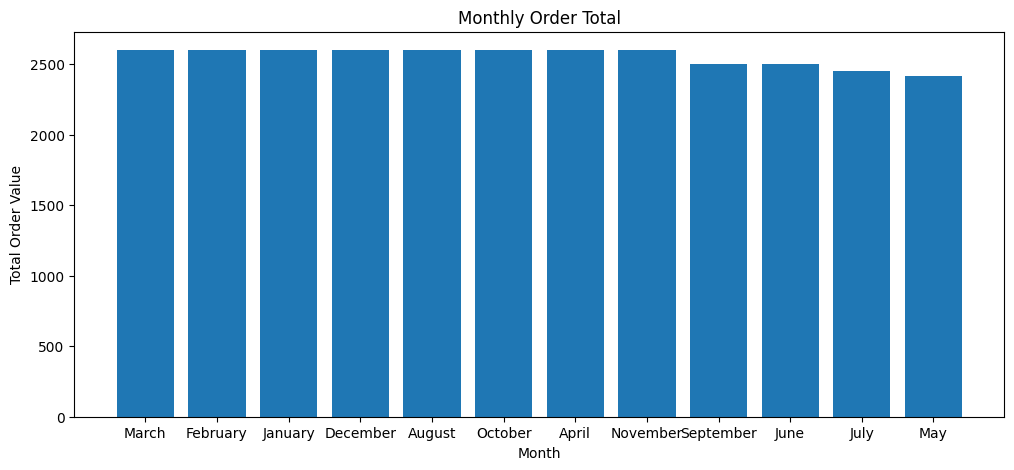

In [11]:
plt.figure(figsize=(12,5))
plt.bar(df["Month"],df["order_total"])
plt.xlabel("Month")
plt.ylabel("Total Order Value")
plt.title("Monthly Order Total")
plt.plot()

[]

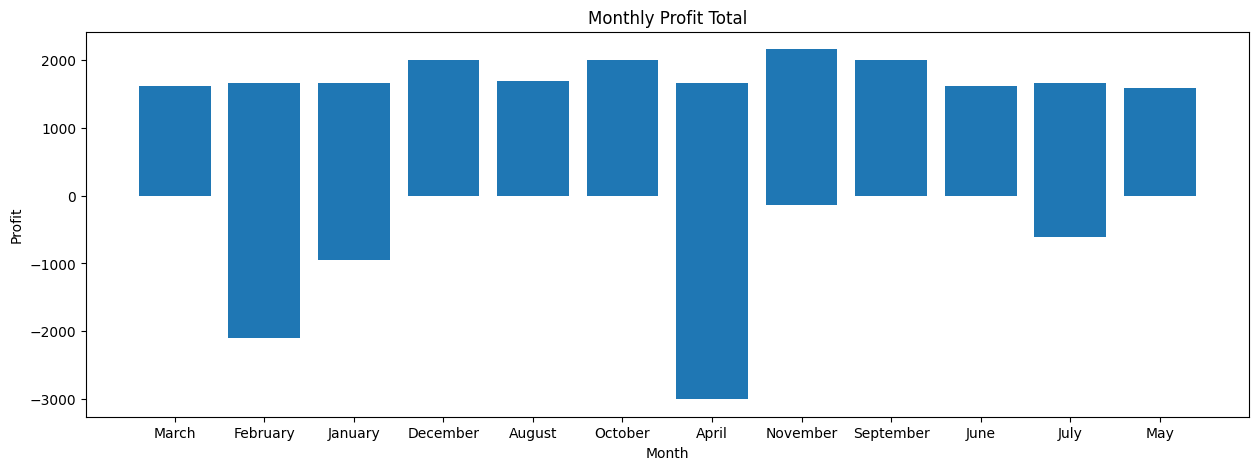

In [12]:
plt.figure(figsize=(15,5))
plt.bar(df["Month"],df["Profit"])
plt.xlabel("Month")
plt.ylabel("Profit")
plt.title("Monthly Profit Total")
plt.plot()

- Maximum profit is obtained in month of November 
- Maximun Loss is held on April month.

[]

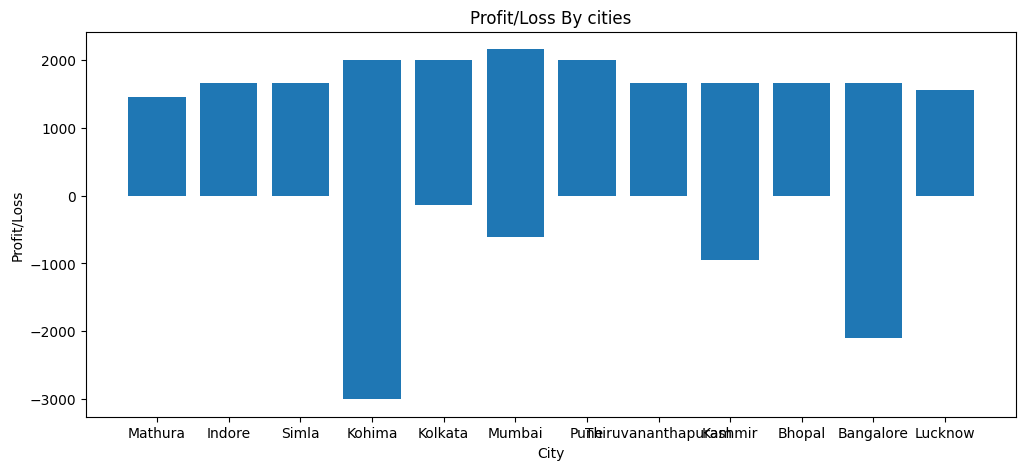

In [13]:
plt.figure(figsize=(12,5))
plt.bar(df["City"],df["Profit"])
plt.xlabel("City")
plt.ylabel("Profit/Loss")
plt.title("Profit/Loss By cities")
plt.plot()

- Maximum Profit is obtained in the Pune City
- Maximun Loss is in the Kohima city

In [14]:
import seaborn as sns

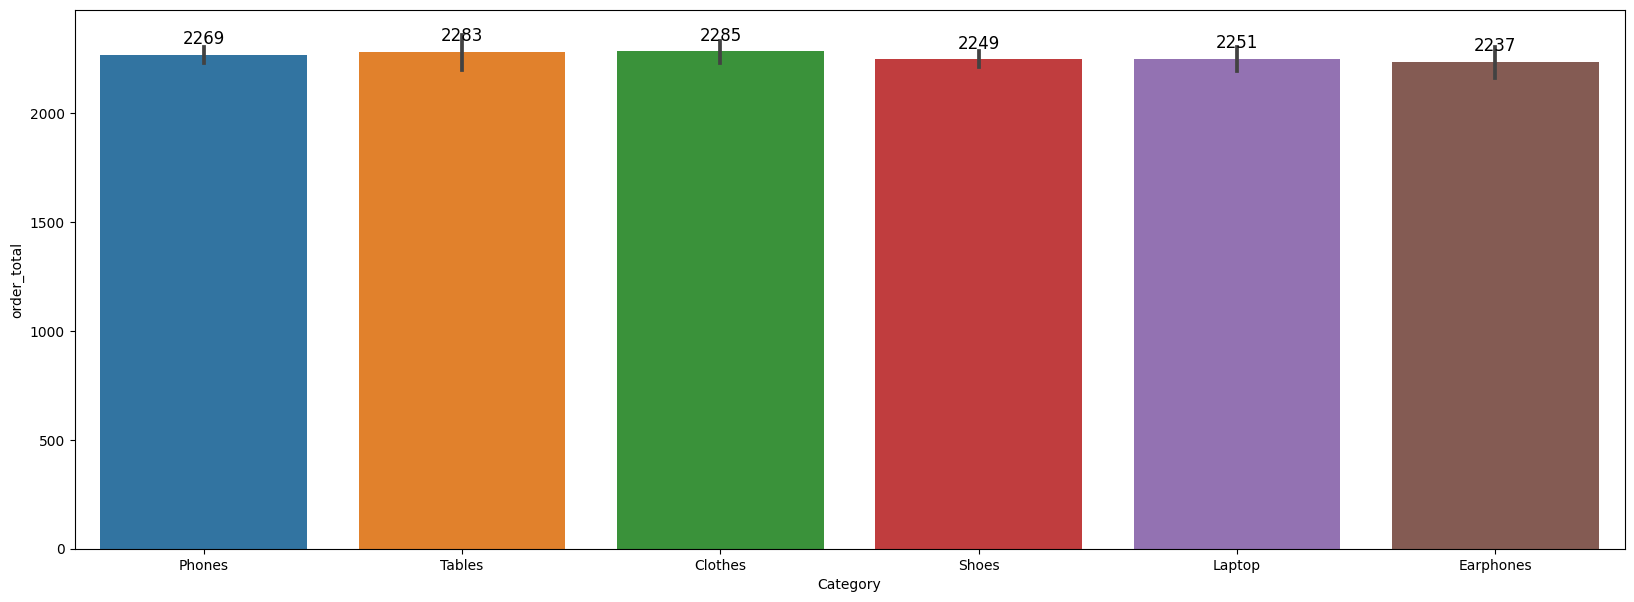

In [15]:
plt.figure(figsize=(20,7))
ax=sns.barplot(data=df,x="Category",y="order_total")
for bar in ax.containers:
    ax.bar_label(bar,fmt="%.0f", fontsize=12, padding=5)
plt.show()


- All the category is approx same sales
- While Eearphones have minimum and Clothes has maximum sales

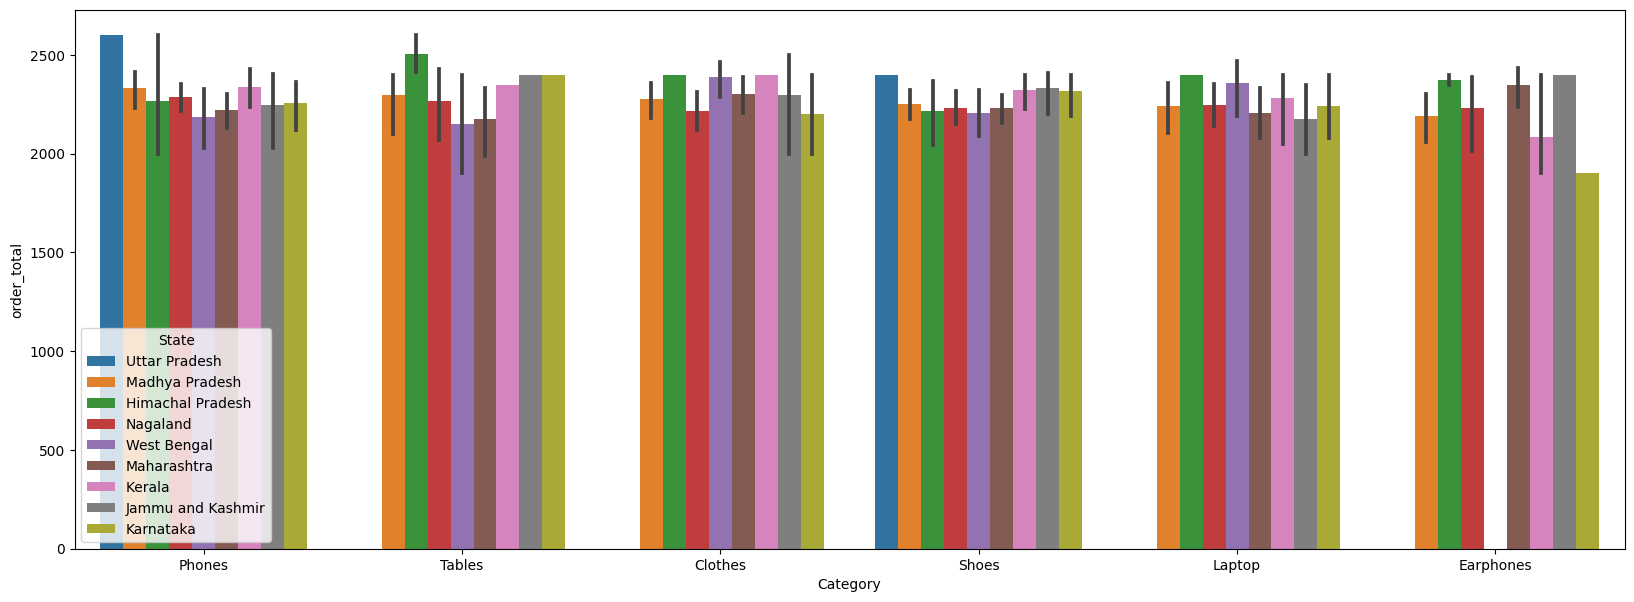

In [16]:
plt.figure(figsize=(20,7))
sns.barplot(data=df,x="Category",y="order_total",hue="State")
plt.show()

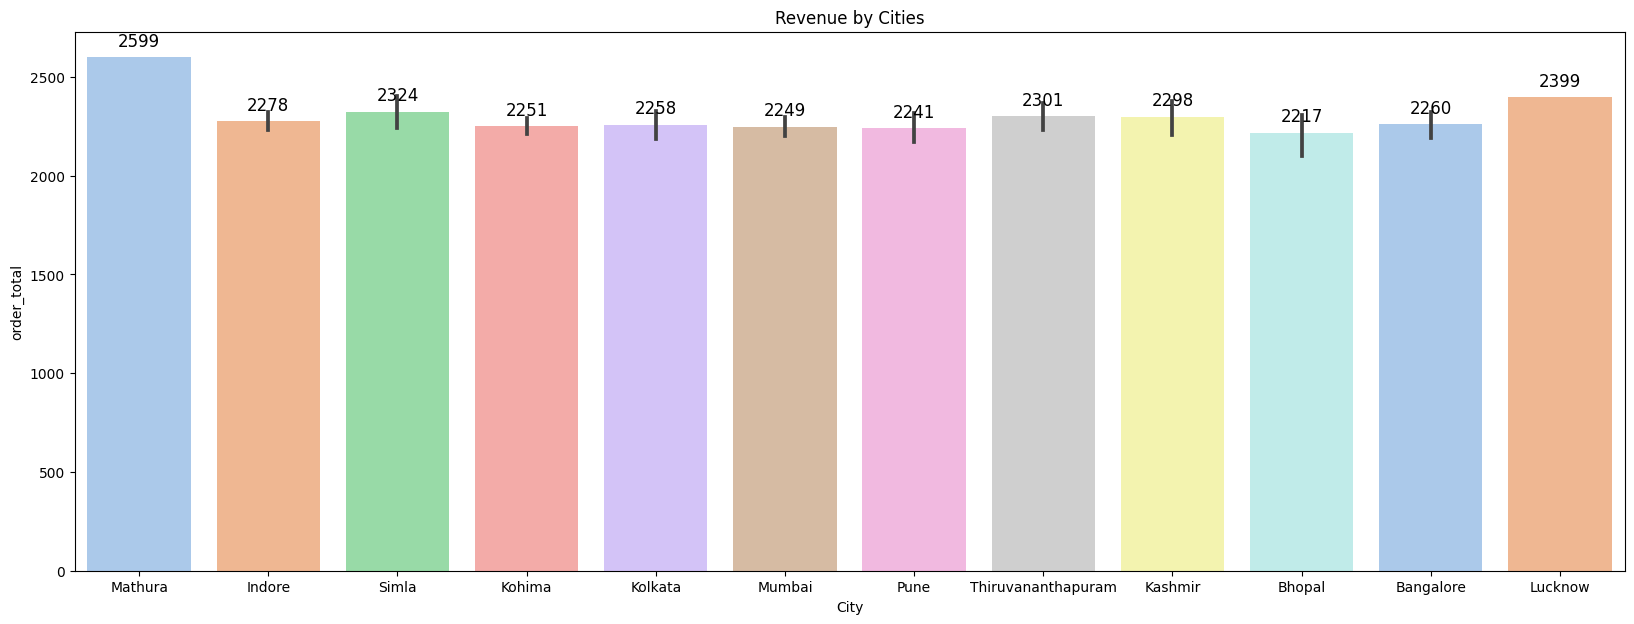

In [17]:
plt.figure(figsize=(20,7))
ax = sns.barplot(data=df, x="City", y="order_total", palette="pastel")
# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=12, padding=5)
plt.title("Revenue by Cities")
plt.show()


- Maximum sales is obtained by the city of mathura 
- Minimum sales is obtaines by the city of Bhopal